In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import string
from collections import Counter
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download necessary NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baru.chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\baru.chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baru.chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
df=pd.read_csv(r"US-Economic-News.csv",encoding='ISO-8859-1')

In [76]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [77]:
df.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
7995,830985632,False,finalized,3,11/17/15 18:16,7.0,0.3511,yes,0.6641,wapo_152454634,2/11/52,"Sawyer Sees Strong Economy For 2 Years, Truce ...",NaN,NaN,Secretary of Commerce Charles W. Sawyer said y...
7996,830985633,False,finalized,3,11/18/15 8:10,NaN,NaN,no,1.0000,wapo_410349039,12/13/09,Oil's losses are airlines' gains,NaN,NaN,"U.S. stocks inched up last week, overcoming co..."
7997,830985634,False,finalized,3,11/18/15 12:12,NaN,NaN,no,1.0000,wapo_410346237,12/18/09,Full Senate to vote on Bernanke; PANEL ADVANCE...,NaN,NaN,Ben S. Bernanke cleared a key hurdle Thursday ...
7998,830985635,False,finalized,3,11/18/15 7:17,NaN,0.0000,no,0.6855,wapo_307808606,1/10/95,Reinventing Opportunities,NaN,NaN,The White House's push to contract out many fe...
7999,830985636,False,finalized,3,11/18/15 11:05,NaN,NaN,no,1.0000,wapo_143151328,4/18/67,Stocks Rise On News of Auto Output: Dow Climbs...,NaN,NaN,NEW YORK. April 17-Automobile stocks put on th...


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               8000 non-null   int64  
 1   _golden                8000 non-null   bool   
 2   _unit_state            8000 non-null   object 
 3   _trusted_judgments     8000 non-null   int64  
 4   _last_judgment_at      8000 non-null   object 
 5   positivity             1420 non-null   float64
 6   positivity:confidence  3775 non-null   float64
 7   relevance              8000 non-null   object 
 8   relevance:confidence   8000 non-null   float64
 9   articleid              8000 non-null   object 
 10  date                   8000 non-null   object 
 11  headline               8000 non-null   object 
 12  positivity_gold        0 non-null      float64
 13  relevance_gold         0 non-null      float64
 14  text                   8000 non-null   object 
dtypes: b

In [79]:
df.shape

(8000, 15)

In [80]:
df["relevance"].value_counts()
#you'll get a Series that shows the counts of each unique value in the "relevance" column of the DataFrame df. This is useful for understanding the distribution of values in that column.

relevance
no          6571
yes         1420
not sure       9
Name: count, dtype: int64

In [81]:
df=df[df["relevance"]!='not sure']
#This line of code filters the DataFrame df to exclude rows where the value in the "relevance" column is "not sure".

In [82]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [83]:
df.shape

(7991, 15)

In [84]:
df["relevance"].value_counts()/df.shape[0]

relevance
no     0.8223
yes    0.1777
Name: count, dtype: float64

In [85]:
df_yes=df[df["relevance"]=='yes']

In [86]:
df_yes["text"].head(10)

0     NEW YORK -- Yields on most certificates of dep...
4     NEW YORK -- Indecision marked the dollar's ton...
5     Stocks declined, as investors weighed slower-t...
9     The U.S. dollar declined against most major fo...
12    Author: James B. Stewart</br></br>The dreaded ...
17    NEW YORK -- The dollar sagged yesterday, as ne...
20    The technology industry, an engine of innovati...
21    WASHINGTON -- While acknowledging that the pac...
27    WASHINGTON -- In a sign that inflation remains...
30    WASHINGTON -- Consumer credit in July continue...
Name: text, dtype: object

In [87]:
df_no=df[df["relevance"]=='no']

In [88]:
df_no["text"].head(10)

1     The Wall Street Journal Online</br></br>The Mo...
2     WASHINGTON -- In an effort to achieve banking ...
3     The statistics on the enormous costs of employ...
6     TORONTO -- Royal Bank of Canada and Bank of Mo...
7     Many people think that the monster of health-c...
8     Sequenom Inc., a genomics-based biotechnology ...
10    The Wall Street Journal Online</br></br>A LATE...
11    MCI WorldCom Inc., fueled by growth in Interne...
13    NEW YORK -- Commercial and industrial loan vol...
14    WASHINGTON -- A week before an international e...
Name: text, dtype: object

In [89]:
df_yes.shape

(1420, 15)

In [90]:
df_no.shape

(6571, 15)

In [91]:
df.shape

(7991, 15)

In [92]:
df=df[["text","relevance"]]

In [93]:
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,yes
1,The Wall Street Journal Online</br></br>The Mo...,no
2,WASHINGTON -- In an effort to achieve banking ...,no
3,The statistics on the enormous costs of employ...,no
4,NEW YORK -- Indecision marked the dollar's ton...,yes


Total counts of both sets relevance
no     6571
yes    1420
Name: count, dtype: int64
                                                   text relevance
0     NEW YORK -- Yields on most certificates of dep...       yes
4     NEW YORK -- Indecision marked the dollar's ton...       yes
5     Stocks declined, as investors weighed slower-t...       yes
9     The U.S. dollar declined against most major fo...       yes
12    Author: James B. Stewart</br></br>The dreaded ...       yes
...                                                 ...       ...
7973  Housing starts surged by 4.4 percent last mont...       yes
7974  When it comes to actually cashing in, stock ma...       yes
7984  Perhaps nothing about the Clinton administrati...       yes
7987  Looking at the enormous -- and incessant -- ti...       yes
7995  Secretary of Commerce Charles W. Sawyer said y...       yes

[1420 rows x 2 columns]


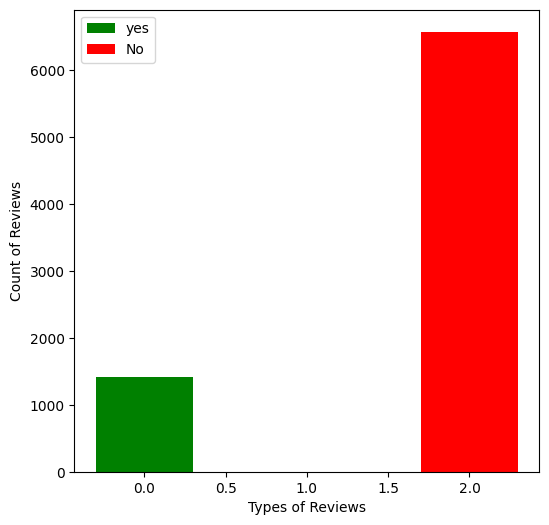

In [94]:
count=df['relevance'].value_counts() # Counts the  Ocurrences of unique vaules in series 
print('Total counts of both sets'.format(),count)
print("==============")
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='yes',color='Green')  # This line sets the size of the plot figure to 6x6 inches using the rcParams dictionary in Matplotlib, which controls the default styles for plots
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='No',color='Red')  #This line creates a bar plot for the count of 'bad' reviews. The bar is positioned at x-coordinate 2, with a width of 0.6. It's labeled as 'No' and colored red
    plt.legend()
    plt.ylabel('Count of Reviews')
    plt.xlabel('Types of Reviews')
    plt.show()
count_good=df[df['relevance']=='yes']
print(count_good)
count_bad=df[df['relevance']=='no']
plot_counts(len(count_good),len(count_bad))

In [95]:
# Split the text into words
word_list = count_good['text'].str.split()[0]

# Convert the list of words into a pandas Series
word_series = pd.Series(word_list)

# Apply the lambda function to calculate the length of each word
word_lengths = word_series.apply(lambda z: len(z))
word_lengths 

0       3
1       4
2       2
3       6
4       2
       ..
150     2
151     5
152     3
153     6
154    13
Length: 155, dtype: int64

Postive 'relevance':0       155
4       167
5       113
9       168
12      143
       ... 
7973    186
7974    278
7984    160
7987    607
7995    190
Name: text, Length: 1420, dtype: int64
Negative 'relevance':0       155
4       167
5       113
9       168
12      143
       ... 
7973    186
7974    278
7984    160
7987    607
7995    190
Name: text, Length: 1420, dtype: int64


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\2034493815.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\2034493815.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




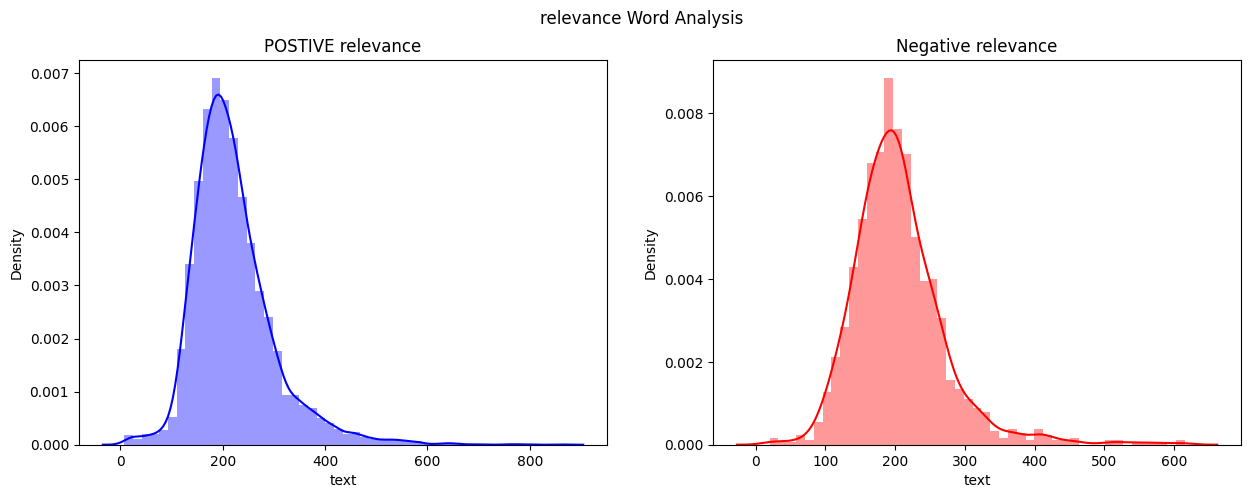

In [96]:
def cal_len(data):
    return len(data)


def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()

count_good_words=count_good['text'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['text'].str.split().apply(lambda z:cal_len(z))

print("Postive 'relevance':" + str(count_good_words))
print("Negative 'relevance':" + str(count_good_words))


plot_count(count_good_words,count_bad_words,"POSTIVE relevance","Negative relevance","relevance Word Analysis")


In [97]:
S_s=[]
# Split the text into words
word_list = count_good['text'][0] #.str.split()[0]

# Convert the list of words into a pandas Series
word_series = pd.Series(word_list)
for word in word_series:
    for char in word:
         #print(char)
         if char in string.punctuation:
              S_s.append(char)
print(S_s)
print('\n')
print(len(S_s))


['-', '-', ',', '-', '.', '<', '/', '>', '<', '/', '>', '-', ',', '"', ',', '"', ',', '-', '.', '%', '.', '%', ',', '-', ',', ',', '.', ',', '.', '<', '/', '>', '<', '/', '>', '-', '"', '"', ',', '.', '%', '.', '%', ',', '.', ',', ',', '%', '-', '.', '<', '/', '>', '<', '/', '>', '-', ',', '.', '%', '.', '%', ',', '.', '<', '/', '>', '<', '/', '>', '-', '-', "'", ',', '.', '%', '.', '%', ',', '.']


80


In [98]:
# Split the text into words
word_list = count_good['text'][0] #.str.split()[0]

# Convert the list of words into a pandas Series
word_series = pd.Series(word_list)
print(word_series)
# Apply the lambda function to calculate the length of each word
word_pun = word_series.apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
word_pun

0    NEW YORK -- Yields on most certificates of dep...
dtype: object


0    80
dtype: int64

Postive 'relevance':0        80
4        62
5        77
9        65
12       60
       ... 
7973     56
7974     58
7984     45
7987    151
7995     38
Name: text, Length: 1420, dtype: int64
count_bad_punctuations':1        88
2        54
3        86
6        88
7       116
       ... 
7994     46
7996     76
7997     62
7998     69
7999     50
Name: text, Length: 6571, dtype: int64


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\2034493815.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\2034493815.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




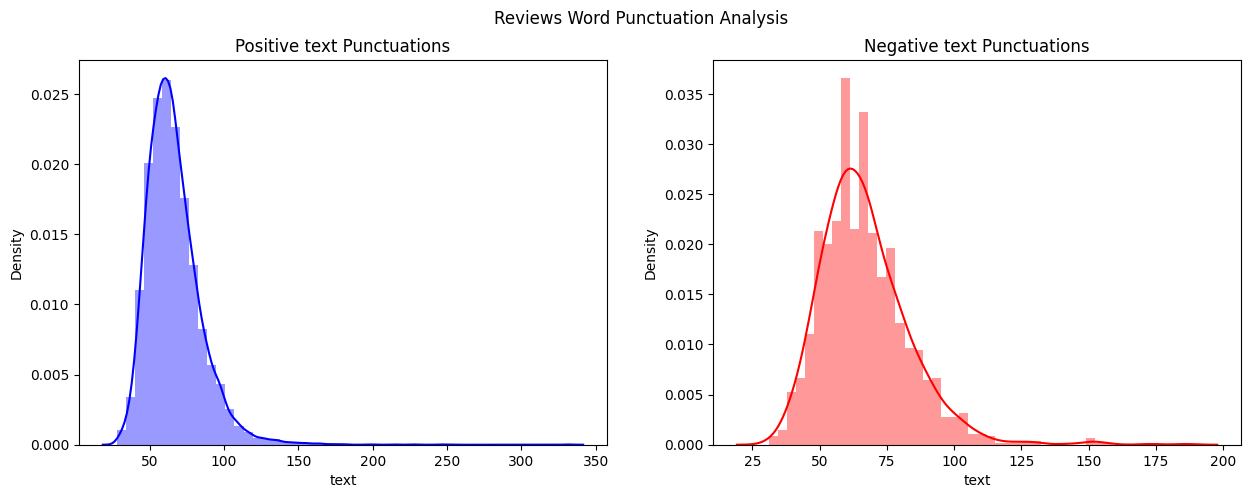

In [99]:
count_good_punctuations=count_good['text'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
print("Postive 'relevance':" + str(count_good_punctuations))
print("======================")
count_bad_punctuations=count_bad['text'].apply(lambda z : len([c for c in str(z) if c in string.punctuation]))
print("count_bad_punctuations':" + str(count_bad_punctuations))
plot_count(count_good_punctuations,count_bad_punctuations,"Positive text Punctuations","Negative text Punctuations","Reviews Word Punctuation Analysis")

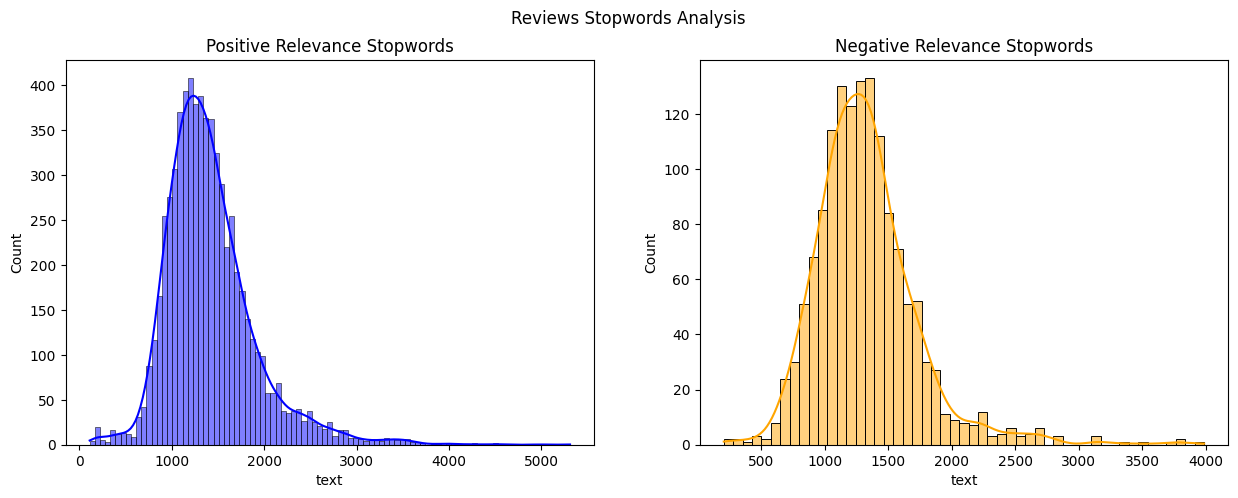

In [100]:

def plot_count_1(count_ones, count_zeros, title_1, title_2, subtitle):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(count_zeros, ax=ax1, color='Blue', kde=True)
    ax1.set_title(title_1)
    sns.histplot(count_ones, ax=ax2, color='Orange', kde=True)
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()

stops = set(stopwords.words('english'))
count_good_stops = count_good['text'].apply(lambda z: np.mean([len(z) for w in str(z).split()]))
count_bad_stops = count_bad['text'].apply(lambda z: np.mean([len(z) for w in str(z).split()]))
plot_count_1(count_good_stops, count_bad_stops, "Positive Relevance Stopwords", "Negative Relevance Stopwords", "Reviews Stopwords Analysis")


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\978730737.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\978730737.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




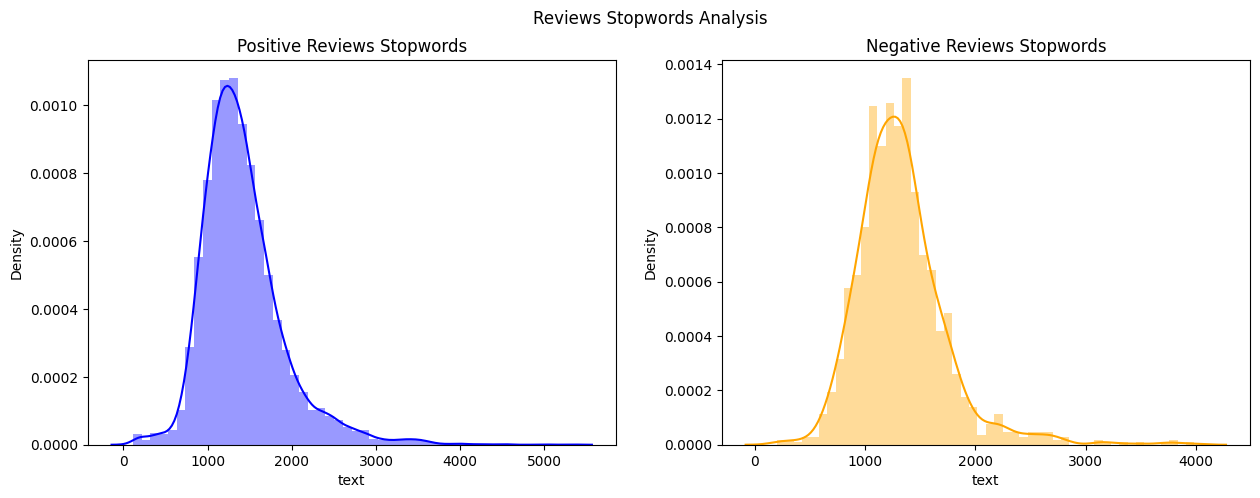

In [101]:
def plot_count_1(count_ones, count_zeros, title_1, title_2, subtitle):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.distplot(count_zeros, ax=ax1, color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones, ax=ax2, color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()

stops = set(stopwords.words('english'))

# Assuming count_good and count_bad are DataFrames containing positive and negative reviews respectively

count_good_stops = count_good['text'].apply(lambda z: np.mean([len(z) for w in str(z).split() if w.lower() not in stops]))
count_bad_stops = count_bad['text'].apply(lambda z: np.mean([len(z) for w in str(z).split() if w.lower() not in stops]))

plot_count_1(count_good_stops, count_bad_stops, "Positive Reviews Stopwords", "Negative Reviews Stopwords", "Reviews Stopwords Analysis")


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\978730737.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\baru.chandra\AppData\Local\Temp\ipykernel_31224\978730737.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




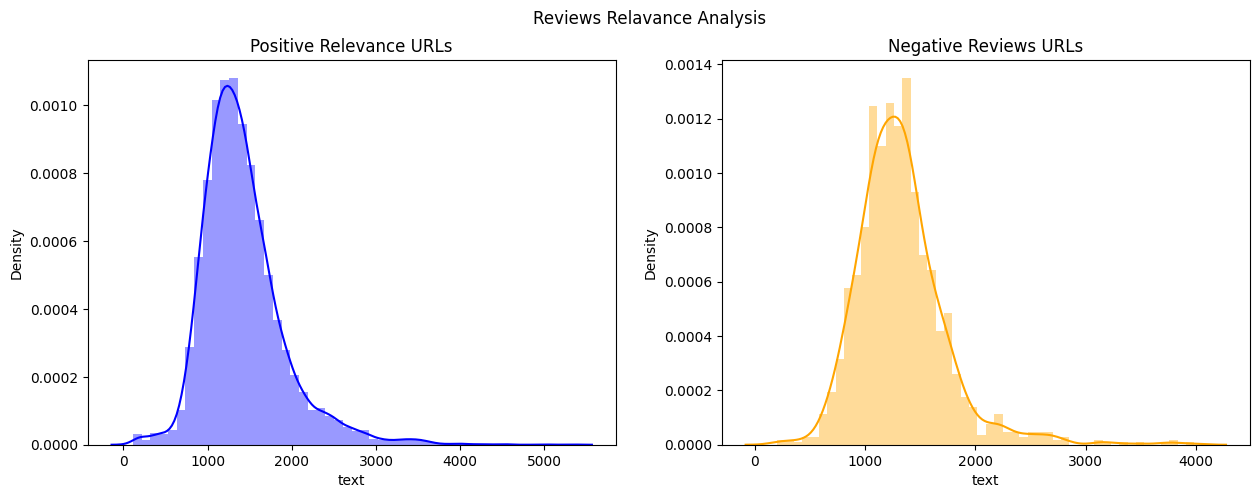

In [102]:
## Checking number of Urls
count_good_urls=count_good['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
count_bad_urls=count_bad['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

plot_count_1(count_good_stops,count_bad_stops,"Positive Relevance URLs","Negative Reviews URLs","Reviews Relavance Analysis")


<Axes: >

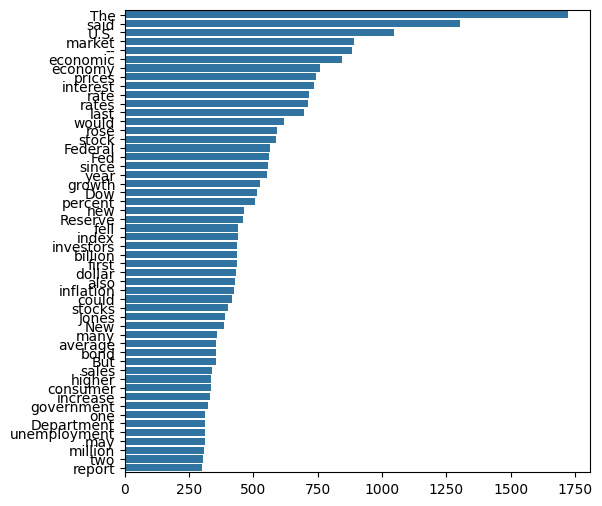

In [103]:
#Simplified counter function
def create_corpus(word):
    corpus=[]
    
    for x in df[df['relevance']==word]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus('yes')
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in stops) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [104]:
df['relevance']=df.relevance.map({'yes':1,'no':0})

In [105]:
df.head(2)

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0


In [106]:
# Convert the 'relevance' column to string type
#df['relevance'] = df['relevance'].astype(str)

# Convert the 'relevance' column to lowercase
df['text'] = df['text'].str.lower().str.strip()


In [107]:
df['text'][0]

'new york -- yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>on small-denomination, or "consumer," cds sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by banxquote money markets, a wilmington, del., information service.</br></br>on three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to banxquote. two banks in the banxquote survey, citibank in new york and corestates in pennsylvania, are paying less than 5% on threemonth small-denomination cds.</br></br>declines were somewhat smaller on five-year consumer cds, which eased to 7.37% from 7.45%, banxquote said.</br></br>yields on three-month and six-month treasury bills sold at monday\'s auction plummeted more than a fifth of a percentage po

In [108]:
# import spacy

# # Download and install the English model
# #!python -m spacy download en_core_web_sm

# # Load the English tokenizer, tagger, parser, NER, and word vectors
# nlp = spacy.load("en_core_web_sm")

# # Assuming df is your DataFrame and 'text' is the column containing text data
# text = df['text']

# # Process each document in the DataFrame using the loaded model
# docs = [nlp(doc) for doc in text]

# # Convert text to lowercase for each document
# lowercase_texts = [doc.text.lower() for doc in docs]

# # Print the lowercase text of the first document as an example
# print(lowercase_texts[0])



In [109]:
#lowercase_texts[2]

In [110]:
df['text'][2]

"washington -- in an effort to achieve banking reform, senate negotiators and the bush administration have agreed to drop efforts to allow banks to expand further into the securities business.</br></br>the compromise is one of several the senate banking committee is pursuing to remove obstacles its banking bill will face when the senate starts voting on the measure, perhaps today. the latest version of the house banking bill also drops the administration's proposals to broaden bank entry into the securities business.</br></br>last night, the house began its second attempt to pass a banking bill after failing last week, in part because of disagreement over how to allow banks into the securities business. the house adopted on a voice vote provisions that would replenish the bank deposit insurance fund, tighten bank regulation, trim the scope of deposit insurance, and restrict the federal reserve board's ability to keep sick banks alive with loans.</br></br>but the house delayed until tod

In [111]:

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Print DataFrame before removing HTML tags
print("DataFrame before removing HTML tags:")
print(df)

# Apply the function to the entire DataFrame
df['text'] = df['text'].apply(remove_html_tags)

# Print DataFrame after removing HTML tags
print("\nDataFrame after removing HTML tags:")
print(df)


DataFrame before removing HTML tags:
                                                   text  relevance
0     new york -- yields on most certificates of dep...          1
1     the wall street journal online</br></br>the mo...          0
2     washington -- in an effort to achieve banking ...          0
3     the statistics on the enormous costs of employ...          0
4     new york -- indecision marked the dollar's ton...          1
...                                                 ...        ...
7995  secretary of commerce charles w. sawyer said y...          1
7996  u.s. stocks inched up last week, overcoming co...          0
7997  ben s. bernanke cleared a key hurdle thursday ...          0
7998  the white house's push to contract out many fe...          0
7999  new york. april 17-automobile stocks put on th...          0

[7991 rows x 2 columns]

DataFrame after removing HTML tags:
                                                   text  relevance
0     new york -- yields on mo

In [112]:
df['text'][0]

'new york -- yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.on small-denomination, or "consumer," cds sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by banxquote money markets, a wilmington, del., information service.on three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to banxquote. two banks in the banxquote survey, citibank in new york and corestates in pennsylvania, are paying less than 5% on threemonth small-denomination cds.declines were somewhat smaller on five-year consumer cds, which eased to 7.37% from 7.45%, banxquote said.yields on three-month and six-month treasury bills sold at monday\'s auction plummeted more than a fifth of a percentage point from the previous week, to 5.46% and

In [113]:
# Function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Print DataFrame before removing URLs
print("DataFrame before removing URLs:")
print(df)

# Apply the function to the entire DataFrame
df['text'] = df['text'].apply(remove_urls)

# Print DataFrame after removing URLs
print("\nDataFrame after removing URLs:")
print(df)


DataFrame before removing URLs:
                                                   text  relevance
0     new york -- yields on most certificates of dep...          1
1     the wall street journal onlinethe morning brie...          0
2     washington -- in an effort to achieve banking ...          0
3     the statistics on the enormous costs of employ...          0
4     new york -- indecision marked the dollar's ton...          1
...                                                 ...        ...
7995  secretary of commerce charles w. sawyer said y...          1
7996  u.s. stocks inched up last week, overcoming co...          0
7997  ben s. bernanke cleared a key hurdle thursday ...          0
7998  the white house's push to contract out many fe...          0
7999  new york. april 17-automobile stocks put on th...          0

[7991 rows x 2 columns]

DataFrame after removing URLs:
                                                   text  relevance
0     new york -- yields on most certifi

In [114]:
exclude=string.punctuation

In [115]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [116]:


# # Function to remove punctuations
# def remove_pun(text):
#     exclude = set(string.punctuation)
#     for char in exclude:
#         text = text.replace(char, '')
#     return text

# # Print DataFrame before removing punctuations
# print("DataFrame before removing punctuations:")
# print(df)

# # Apply the function to the entire DataFrame
# df['text'] = df['text'].apply(remove_pun)

# # Print DataFrame after removing punctuations
# print("\nDataFrame after removing punctuations:")
# print(df)


In [117]:
df['text'][0]

'new york -- yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.on small-denomination, or "consumer," cds sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by banxquote money markets, a wilmington, del., information service.on three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to banxquote. two banks in the banxquote survey, citibank in new york and corestates in pennsylvania, are paying less than 5% on threemonth small-denomination cds.declines were somewhat smaller on five-year consumer cds, which eased to 7.37% from 7.45%, banxquote said.yields on three-month and six-month treasury bills sold at monday\'s auction plummeted more than a fifth of a percentage point from the previous week, to 5.46% and

In [118]:


# Function to remove punctuations and digits
def remove_pun_and_digits(text):
    exclude = set(string.punctuation)
    exclude.update(string.digits)
    for char in exclude:
        text = text.replace(char, ' ')
    return text

# Print DataFrame before removing punctuations and digits
print("DataFrame before removing punctuations and digits:")
print(df)

# Apply the function to the entire DataFrame
df['text'] = df['text'].apply(remove_pun_and_digits)

# Print DataFrame after removing punctuations and digits
print("\nDataFrame after removing punctuations and digits:")
print(df)


DataFrame before removing punctuations and digits:
                                                   text  relevance
0     new york -- yields on most certificates of dep...          1
1     the wall street journal onlinethe morning brie...          0
2     washington -- in an effort to achieve banking ...          0
3     the statistics on the enormous costs of employ...          0
4     new york -- indecision marked the dollar's ton...          1
...                                                 ...        ...
7995  secretary of commerce charles w. sawyer said y...          1
7996  u.s. stocks inched up last week, overcoming co...          0
7997  ben s. bernanke cleared a key hurdle thursday ...          0
7998  the white house's push to contract out many fe...          0
7999  new york. april 17-automobile stocks put on th...          0

[7991 rows x 2 columns]

DataFrame after removing punctuations and digits:
                                                   text  relevance
0 

In [119]:
df['text'][0]

'new york    yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week  reflecting the overall decline in short term interest rates on small denomination  or  consumer   cds sold directly by banks  the average yield on six month deposits fell to       from       in the week ended yesterday  according to an    bank survey by banxquote money markets  a wilmington  del   information service on three month  consumer  deposits  the average yield sank to       from       the week before  according to banxquote  two banks in the banxquote survey  citibank in new york and corestates in pennsylvania  are paying less than    on threemonth small denomination cds declines were somewhat smaller on five year consumer cds  which eased to       from        banxquote said yields on three month and six month treasury bills sold at monday s auction plummeted more than a fifth of a percentage point from the previous week  to       and 

In [120]:
df['text'][1]

'the wall street journal onlinethe morning brief  a look at the day s biggest news  is emailed to subscribers by   a m  every business day  sign up for the e mail here on friday evening  with congress out of town on its summer recess and americans heading into a mid august weekend  the bush administration sent a message to the states  the federal government will make it tougher for a national children s insurance program to cover the offspring of middle income families the state children s health insurance program was created in      to help children whose families couldn t afford insurance but didn t qualify for medicaid  and administration officials tell the new york times that the changes are aimed at returning the program to its low  income focus and assuring it didn t become a replacement for private insurance  administration point man dennis smith wrote to state officials saying there would be new restrictions on the district of columbia and the    states    including california 

In [121]:
# # Download the stopwords corpus if you haven't already
# nltk.download('stopwords')

# #

# # Function to remove stop words
# def remove_stop_words(text):
#     stop_words = set(stopwords.words('english'))
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(filtered_words)

# # Print DataFrame before removing stop words
# print("DataFrame before removing stop words:")
# print(df)

# # Apply the function to the entire DataFrame
# df['text'] = df['text'].apply(remove_stop_words)

# # Print DataFrame after removing stop words
# print("\nDataFrame after removing stop words:")
# print(df)


In [122]:
df['text'][1]

'the wall street journal onlinethe morning brief  a look at the day s biggest news  is emailed to subscribers by   a m  every business day  sign up for the e mail here on friday evening  with congress out of town on its summer recess and americans heading into a mid august weekend  the bush administration sent a message to the states  the federal government will make it tougher for a national children s insurance program to cover the offspring of middle income families the state children s health insurance program was created in      to help children whose families couldn t afford insurance but didn t qualify for medicaid  and administration officials tell the new york times that the changes are aimed at returning the program to its low  income focus and assuring it didn t become a replacement for private insurance  administration point man dennis smith wrote to state officials saying there would be new restrictions on the district of columbia and the    states    including california 

In [123]:
# Function to remove stop words and apply lemmatization
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    return ' '.join(lemmatized_words)

# Print DataFrame before preprocessing
print("DataFrame before preprocessing:")
print(df)

# Apply the function to the entire DataFrame
df['text'] = df['text'].apply(preprocess_text)

# Print DataFrame after preprocessing
print("\nDataFrame after preprocessing:")
print(df)


DataFrame before preprocessing:
                                                   text  relevance
0     new york    yields on most certificates of dep...          1
1     the wall street journal onlinethe morning brie...          0
2     washington    in an effort to achieve banking ...          0
3     the statistics on the enormous costs of employ...          0
4     new york    indecision marked the dollar s ton...          1
...                                                 ...        ...
7995  secretary of commerce charles w  sawyer said y...          1
7996  u s  stocks inched up last week  overcoming co...          0
7997  ben s  bernanke cleared a key hurdle thursday ...          0
7998  the white house s push to contract out many fe...          0
7999  new york  april    automobile stocks put on th...          0

[7991 rows x 2 columns]

DataFrame after preprocessing:
                                                   text  relevance
0     new york yield certificate deposit

In [124]:
df['text'][0]

'new york yield certificate deposit offered major bank dropped tenth percentage point latest week reflecting overall decline short term interest rate small denomination consumer cd sold directly bank average yield six month deposit fell week ended yesterday according bank survey banxquote money market wilmington del information service three month consumer deposit average yield sank week according banxquote two bank banxquote survey citibank new york corestates pennsylvania paying le threemonth small denomination cd decline somewhat smaller five year consumer cd eased banxquote said yield three month six month treasury bill sold monday auction plummeted fifth percentage point previous week respectively'

In [125]:
df.head()

,text,relevance
0,new york yield certificate deposit offered maj...,1
1,wall street journal onlinethe morning brief lo...,0
2,washington effort achieve banking reform senat...,0
3,statistic enormous cost employee drug abuse we...,0
4,new york indecision marked dollar tone trader ...,1


In [126]:
df['text'][4]

'new york indecision marked dollar tone trader paused breath awaiting critical monthly u employment report release today dollar ended new york day slightly weaker euro yen market participant also reluctant make major bet yen following stream rigorous sounding statement top japanese official issue bank reform late yesterday afternoon new york euro cent slightly stronger cent level late wednesday yen dollar trading yen modestly yen swiss franc dollar franc unchanged sterling changing hand euro managed raise head briefly cent new york trade first time roughly four week taking advantage softness stock market worry state u economic recovery ahead employment report'

In [127]:
#df=df[:1000]

In [128]:
docs = list(df['text'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [129]:
X=docs
y=df['relevance']
print(X.shape,y.shape)

(7991, 20000) (7991,)


In [130]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
fig = go.Figure([go.Bar(x=y.value_counts().index, y=y.value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

In [132]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6392, 20000) (6392,)
(1599, 20000) (1599,)


In [133]:
gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 6.61 s
Wall time: 7.65 s

Training Accuracy score: 0.9504067584480601
Testing Accuracy score: 0.7848655409631019


In [134]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.84      0.92      0.88      1315
    relevant       0.31      0.18      0.23       284

    accuracy                           0.78      1599
   macro avg       0.57      0.55      0.55      1599
weighted avg       0.74      0.78      0.76      1599



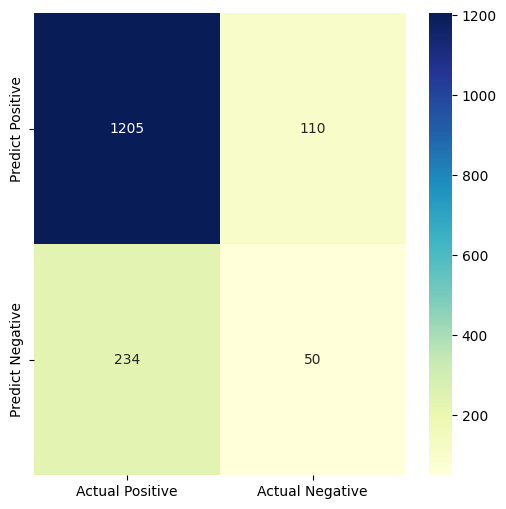

In [135]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [136]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import GaussianNB

# Assuming df is your DataFrame containing 'text' and 'label' columns
docs = list(df['text'])
y =df['relevance']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_features=20000)

# Fit and transform the data
X_count = count_vectorizer.fit_transform(docs)

# Convert the sparse matrix to dense array for visualization
X_count_array = X_count.toarray()

# Splitting data into train and test sets
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X_count_array, y, test_size=0.2, random_state=SEED, stratify=y)
print("Count Vectorization Shape:", X_train.shape, y_train.shape)

# Gaussian Naive Bayes Classifier
gnb = GaussianNB() 

# Fitting and evaluating the model with Count Vectorization
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nCount Vectorization Training Accuracy score:", accuracy_score(y_train, y_pred_train))
print("Count Vectorization Testing Accuracy score:", accuracy_score(y_test, y_pred_test))


Count Vectorization Shape: (6392, 20000) (6392,)

Count Vectorization Training Accuracy score: 0.9504067584480601
Count Vectorization Testing Accuracy score: 0.7854909318323953


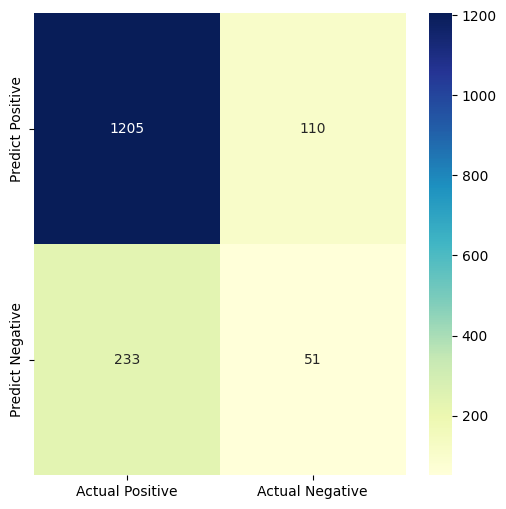

In [137]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [138]:
# Assuming df is your DataFrame containing 'text' and 'label' columns
docs = list(df['text'])
y = df['relevance']

# Initialize HashingVectorizer
hashing_vectorizer = HashingVectorizer(n_features=20000)

# Transform the data
X_hashing = hashing_vectorizer.fit_transform(docs).toarray()  # Convert to dense array

# Splitting data into train and test sets
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X_hashing, y, test_size=0.2, random_state=SEED, stratify=y)
print("Hashing Vectorization Shape:", X_train.shape, y_train.shape)

# Gaussian Naive Bayes Classifier
gnb = GaussianNB() 

# Fitting and evaluating the model with Hashing Vectorization
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nHashing Vectorization Training Accuracy score:", accuracy_score(y_train, y_pred_train))
print("Hashing Vectorization Testing Accuracy score:", accuracy_score(y_test, y_pred_test))


Hashing Vectorization Shape: (6392, 20000) (6392,)

Hashing Vectorization Training Accuracy score: 0.9272528160200251
Hashing Vectorization Testing Accuracy score: 0.7773608505315822


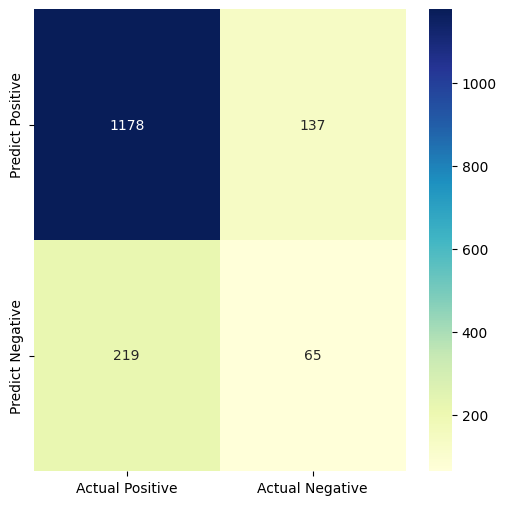

In [139]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()